# Analising data from Black Friday

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BlackFriday.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


As we can see there are missing/nan values in 'Product_Category_2' and 'Product_Category_3'

For our interest we don't need the columns of User_ID and Product_ID

In [4]:
df.drop(labels=['User_ID','Product_ID'], axis=1, inplace=True)

In [5]:
## to check which columns have null values.
df.isna().any()

Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

So looks like Product_Category_2 and Product_Category_3 have some null values. We could check their unique values and then assign a default value accordingly for NaNs

In [6]:
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [7]:
## So all values are in integer range. Maybe we can assign value zero for the NaN cases
df.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


Now we can search the proportion of amount spent by gender

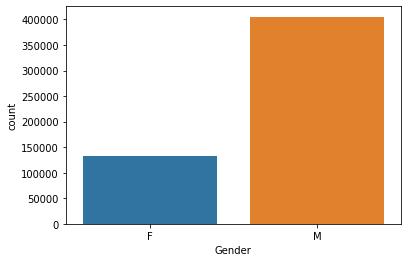

In [8]:
sns.countplot(df['Gender'])

In [9]:
df_grp_gender = df.groupby('Gender')
df_grp_gender['Purchase'].apply(lambda x: x.describe())

Gender       
F       count    132197.000000
        mean       8809.761349
        std        4721.440055
        min         185.000000
        25%        5459.000000
        50%        7929.000000
        75%       11436.000000
        max       23959.000000
M       count    405380.000000
        mean       9504.771713
        std        5051.057256
        min         185.000000
        25%        5901.000000
        50%        8112.000000
        75%       12542.000000
        max       23961.000000
Name: Purchase, dtype: float64

And by sge

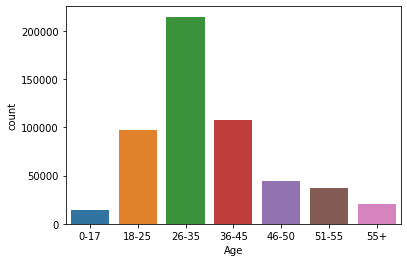

In [10]:
sns.countplot(df['Age'], order=np.sort(df['Age'].unique()))

In [26]:
df_grp_age = df.groupby('Age')
df_grp_age['Purchase'].apply(lambda x: x.describe())
df_grp_age['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

In [17]:
df_grp_age['Gender'].value_counts(normalize=True)

Age    Gender
0-17   M         0.663222
       F         0.336778
18-25  M         0.753600
       F         0.246400
26-35  M         0.770143
       F         0.229857
36-45  M         0.754230
       F         0.245770
46-50  M         0.711270
       F         0.288730
51-55  M         0.743899
       F         0.256101
55+    M         0.764197
       F         0.235803
Name: Gender, dtype: float64

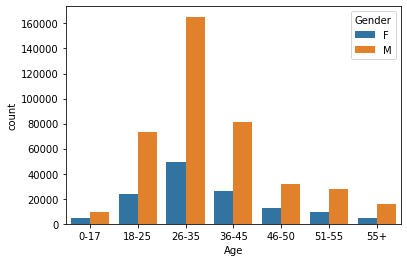

In [13]:
sns.countplot(df['Age'], order=np.sort(df['Age'].unique()) , hue=df['Gender'])



May be we could check further - how many of these males were actually married? For this lets create a column that represents gender+married status and then use it as hue.


In [14]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


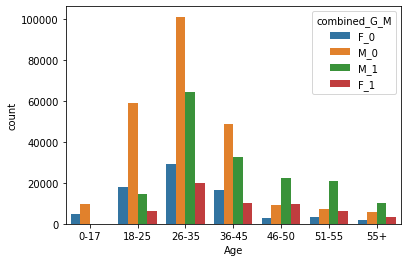

In [16]:
sns.countplot(df['Age'], order=np.sort(df['Age'].unique()), hue=df['combined_G_M'])

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

In [24]:
df_grp_combGM = df.groupby('combined_G_M')
df_grp_combGM['Purchase'].apply(lambda x: x.describe())
df_grp_combGM['Purchase'].mean()

combined_G_M
F_0    8753.809299
F_1    8887.751553
M_0    9518.540223
M_1    9484.617891
Name: Purchase, dtype: float64

Product type by Marital status

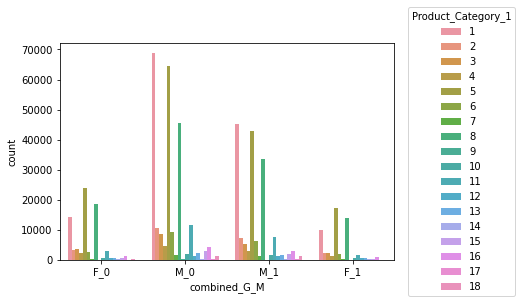

In [50]:
ax = sns.countplot(df['combined_G_M'], hue=df['Product_Category_1'])
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center', title='Product_Category_1')

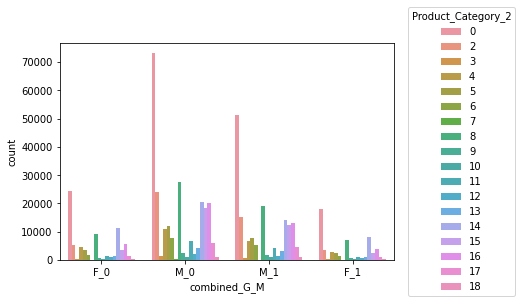

In [42]:
ax = sns.countplot(df['combined_G_M'], hue=df['Product_Category_2'])
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center', title='Product_Category_2')

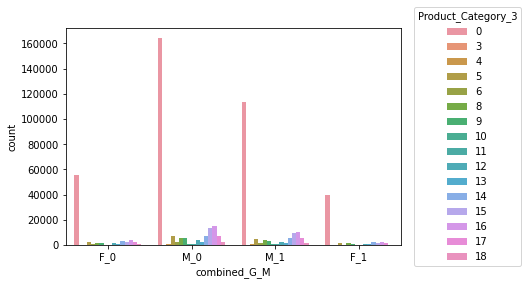

In [51]:
ax = sns.countplot(df['combined_G_M'], hue=df['Product_Category_3'])
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center', title='Product_Category_3')